![title](../images/logo_nao_digital.png)

# Tema 1: Fundamentos de Modelos de Aprendizaje de Máquina
## 1. Objetivo

Familiarizarse con los conceptos de Aprendizaje de Máquina para plantear un modelo predictivo de la demanda de renta de bicicletas.

## Datos de BikerPro

Cómo se ha mencionado en el Anexo A, se ha provisto la siguiente información al equipo del `Ministerio de Análisis de Datos`:

| Nombre 	| Descripción 	| Tipo 	|
|---	|---	|---	|
| Date 	| Fecha (con año, mes y dia) 	| Fecha 	|
| Rented Bike Count 	| Cantidad de bicicletas rentadas por fecha y hora  	| Entero 	|
| Hora 	| Hora del día 	| Entero 	|
| Temperature 	| Temperatura promedio en grados centígrados 	| Real 	|
| Humidity  	| Nivel de humedad en el ambiente, en porcentaje. 	| Real 	|
| Wind speed 	| Velocidad del viento, en metros sobre segundo 	| Real 	|
| Visibility 	| Medida del nivel de visibilidad de 10 metros (mayor visibilidad   implica mejores condiciones meteorológicas para ver de lejos a un objeto). 	| Real 	|
| Dew point temperature 	| Temperatura de punto de rocío, es decir temperatura más alta en que   el agua se condensa, medida en grados centígrados 	| Número Real 	|
| Solar radiation  	| Es una medida de la radiación solar promedio existente en el   ambiente, medida Megajoules / metros cuadrados 	| Número Real 	|
| Rainfall 	| Se refiere a la cantidad de precipitación pluvial que hay a nivel   de suelo, medida en milímetros 	| Número Real 	|
| Snowfall 	| Nivel de caída de nivel (en centímetros) 	| Numérico 	|
| Seasons 	| Estación del año en inglés (Winter, Spring, Summer, Autumn) 	| Texto 	|
| Holiday 	| Indica si esa fecha y hora es festiva 	| Texto 	|
| Functional Day 	| Describe si en esa hora específica el servicio de renta se   encontraba en funcionamiento (se podía rentar un equipo) o no 	| Texto    	|




Este documento se desarrollarán scripts en Python que permitan plantear un primer modelo predictivos para predecir la demanda de renta de bicicletas de BikePro a partir de principios de Aprendizaje de Máquina

## 2. Librerias de trabajo

In [1]:
# Instala libreria Pandas si no la tenemos
#pip install pandas seaborn scikit-learn -y

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

Primero nos encargaremos de leer los datos, indicando a Python donde se encuentra la carpeta que contiene los datos y los nombres de los archivos relevantes para el análisis.

In [3]:
#  Indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos de BikerPro
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH=""

Ahora procederemos a definir una variable que indique el nombre del archivo junto con su extensión (por ejemplo, `.csv`):

In [4]:
FILE_BIKERPRO = 'SeoulBikeData.csv'

Echaremos mano de la utilidad `os.path.join` de Python que indicar rutas en tu computadora donde se ubican archivos, así Pandas encontrá los archivos de datos.


**Ejemplo**

A continuación mostraremos un ejemplo leyendo el archivo `SeoulBikeData.csv`:

In [5]:
# Ejemplo
print(f"Ruta del archivo: {FILE_BIKERPRO}")
print(os.path.join(DATA_PATH, FILE_BIKERPRO))

Ruta del archivo: SeoulBikeData.csv
/Users/cesar/sandbox/tecmilenio/DN_PRO_20/data/SeoulBikeData.csv


In [6]:
# Leemos con pandas
bikerpro = pd.read_csv(
    os.path.join(DATA_PATH, FILE_BIKERPRO),
    encoding = "ISO-8859-1"
    )

In [7]:
bikerpro.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


Por simplicidad, limpiaremos los encabezado eliminando unidades, quitando espacios y transformando las letras a minusculas:

In [8]:
# formato de columnas en crudo
raw_columns = list(bikerpro.columns)
raw_columns

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [9]:
clean_columns = [
    x.lower().\
        replace("(°c)", '').\
        replace("(%)", '').\
        replace(" (m/s)", '').\
        replace(" (10m)", '').\
        replace(" (mj/m2)", '').\
        replace("(mm)", '').\
        replace(" (cm)", '').\
        replace(" ", '_')
    for x in bikerpro.columns
    ]

In [10]:
# Ahora asignamos los nuevmos nombres de columnas para el análisis
bikerpro.columns = clean_columns

Además convertiremos al formato adecuado a la columna de fecha:

In [11]:
bikerpro['date'] = pd.to_datetime(bikerpro['date'], format='%d/%m/%Y')

Como sabemos el proceso anterior nos convierte limpia las columnas para dejarlas en el formato descrito a continuación:

In [12]:
bikerpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

## 4. Fundamentos de Aprendizaje de Máquina

El aprendizaje de máquina (también conocido como "machine learning" en inglés) es una rama de la inteligencia artificial que se enfoca en enseñar a las computadoras a aprender patrones y relaciones a partir de datos, sin que se les haya sido especificamente programado para hacerlo. Es decir, en lugar de decirle a una computadora exactamente qué reglas explícitas seguira para cada situación, le proporcionamos un conjunto de datos y un conjunto de instrucciones generales y le pedimos que aprenda por sí misma a partir de esa información, generalmente bajo algún marco de referencia estadístico.

Este tipo de enfoque puede ser muy útil para automatizar tareas y tomar decisiones en base a datos, pues los sistemas computaciones pueden  aprender y mejorar continuamente a medida que se les da más información.

A su vez, puede definirse como el proceso de resolver un problema práctico mediante 1) la recopilación de un conjunto de datos y 2) la construcción algorítmica de un modelo estadístico basado en ese conjunto de datos. Se supone que ese modelo estadístico se utilizará de alguna manera para resolver el problema práctico.

### 4.1 Tipos de aprendizaje

En términos muy generales, el aprendizaje de máquina se puede dividir en 4 grandes grupos, que se ocupan de resolver problemas distintos:

**Aprendizaje supervisado:** En este tipo de aprendizaje, el modelo de la máquina aprende a partir de un conjunto de datos etiquetados. Es decir, el modelo recibe un conjunto de datos con entradas (características) y salidas (objetivos) conocidos y aprende a predecir la salida correcta para nuevas entradas. Por ejemplo, si queremos construir un modelo de aprendizaje supervisado para predecir el precio de una casa, podríamos darle al modelo un conjunto de datos que incluya características de las casas (como el número de habitaciones, baños, tamaño de la casa) y sus precios de venta, y el modelo aprenderá a predecir el precio de una nueva casa en función de sus características.

**Aprendizaje no supervisado:** En este tipo de aprendizaje, el modelo de la máquina aprende a partir de un conjunto de datos sin etiquetar. Es decir, el modelo recibe un conjunto de datos solo con entradas (características) y debe encontrar patrones y estructuras en los datos por sí mismo. Por ejemplo, si queremos agrupar usuarios en diferentes segmentos según sus preferencias de compra, podríamos darle al modelo un conjunto de datos con información sobre las compras de los usuarios (como los productos que han comprado) y el modelo podría agrupar los usuarios que tienen patrones de compra similares. Este tipo de aprendizaje es muy usado en marketing.

**Aprendizaje semi-supervisado:** Este tipo de aprendizaje combina elementos de aprendizaje supervisado y no supervisado. El modelo de la máquina recibe un conjunto de datos que incluye tanto datos etiquetados como no etiquetados y debe aprender a partir de ambos. Por ejemplo, si tenemos un conjunto de datos con algunos correos electrónicos etiquetados como "spam" y otros como "no spam", y también tenemos muchos correos electrónicos sin etiquetar, podríamos utilizar un modelo de aprendizaje semi-supervisado para clasificar los correos electrónicos sin etiquetar en "spam" o "no spam".

**Aprendizaje por refuerzo:** En este tipo de aprendizaje, el modelo de la máquina aprende a través de un proceso de prueba y error. El modelo interactúa con un entorno y recibe recompensas o castigos por sus acciones. El objetivo del modelo es aprender a tomar las acciones que maximizan la recompensa a largo plazo. Por ejemplo, si queremos construir un modelo de aprendizaje por refuerzo para jugar al ajedrez, el modelo jugaría contra sí mismo varias veces y aprendería de sus errores y victorias para mejorar su estrategia en futuros juegos. Éste tipo de aprendizaje ha sido muy popular para desarrollar modelos que puedan jugar videosjuegos o juego complejos como Go.

### 4.2 ¿Cómo funciona el aprendizaje supervisado?

Cómo hemos mencionado, el aprendizaje supervisado es una técnica de inteligencia artificial en la que una máquina aprende a partir de datos de entrada y sus correspondientes resultados esperados.


Para entenderlo mejor, tomemos un ejemplo: Supongamos que queremos construir un modelo que pueda predecir la altura de una persona en función de su peso, edad, color de ojos y tipo de sangre. Para entrenar nuestro modelo de aprendizaje de máquina supervisado, necesitamos un conjunto de datos etiquetados, que incluya el peso, la edad, el color de ojos, el tipo de sangre y la altura de varias personas. Este conjunto de datos se llama conjunto de entrenamiento. En la tabla inferior, se muestra un conjunto de datos que podríamos tomar para predecir la altura de una persona en este problema específico:

| nombre 	| peso 	| edad 	| color_ojos 	| tipo_sangre 	| altura 	|
|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|
| bruce wayne 	| 86 	| 51 	| café 	| o+ 	| 191 	|
| peter parker 	| 75 	| 22 	| azul 	| o+ 	| 171 	|
| louis lanne 	| 51 	| 34 	| miel 	| ab- 	| 151 	|
| ... 	| ... 	| ... 	| ... 	| ... 	| ... 	|
| lex luthor 	| 106 	| 47 	| verde 	| a- 	| 182 	|



A continuación, nuestro modelo utiliza este conjunto de entrenamiento para encontrar patrones en los datos que le permitan predecir la altura de una persona a partir de su peso. Este conjunto de datos se usa para ajustar una función matemática llamada modelo, a través de cantidades numéricas que esencialmente son pesos o sesgos que permite al modelo ajustarse a la información de los datos. La idea es minimizar la diferencia entre las predicciones generadas con dicho modelo y los valores reales.

Una vez que el modelo ha sido entrenado, podemos usarlo para hacer predicciones sobre nuevos datos que no están en el conjunto de entrenamiento. Por ejemplo, podemos ingresar el peso, la edad, el color de ojos, el tipo de sangre y el género de una persona en el modelo y el modelo nos dará una predicción de su altura.

Siendo un poco más precisos y de manera general, el aprendizaje automático necesita una :

* Una colección de datos con características $X_1, \ldots X_n$ y una varible objetivo $Y$ a predecirse,
* Una función  $f$ que aproxime el valor de $Y$ a partir de las características  $X_1, \ldots X_n$, definida posiblemente con algún conjunto de parámetros $\Theta$. Es decir:
  * $f(X_1, \ldots X_n, \Theta) \approx Y$
* Una forma de medir el error entre la predicción del modelo, esta se conoce típicamente como función de pérdida y esencialmente es una representación matemática que nos permite saber cuanto dista la predicción del valor real de la etiqueta:

  $$ l(f(X_1, \ldots X_n, \Theta), Y) $$
* Alguna técnica algorítmica que permita ajustar los valores de los parámetros $\Theta$ hasta  encontra un valor donde se alcance el mínimo error posible, es decir, minimizar la función de pérdida 

$$ \min_{\Theta} l(f(X_1, \ldots X_n, \Theta), Y)  $$


### 4.3 ¿Porqué un modelo funciona en datos nuevos?

En aprendizaje de máquina el objetivo principal es que el modelo sea capaz de predecir, con cierto nivel de error, las etiquetas de datos que no fueron usados en su entrenamiento, es decir, que **generalice** adecuadamente.

La idea esencial del porque un modelo entrenado funcion con datos inéditos es que aunque los nuevos datos nunca hayan sido vistos, las características deben ser parecidas a las que el modelo recibió inicialmente si se le brindaron una cantidad suficiente de ejemplos y si la información a la que tuvo acceso a representativa del fenómeno que está intentando predecir.

Es decir, la información estadística contenido en los datos y la lógica que el modelo encierra dentro de si mismo, permite aproximar el fenómeno a un nivel suficientemente cercano de datos que se parecen a los que originalmente sirvieron para su entrenamiento.

### 4.4 ¿Que tipos de problemas de aprendizaje supervizado existen?

Fundamentalmente existen dos tipos de problemas de aprendizaje supervisado de acuerdo al tipo de etiquetas que tienen los datos: regresión y clasificación.

En el caso de la regresión, la máquina debe predecir un valor numérico continuo. Por ejemplo, si se tiene un conjunto de datos con la altura y el peso de varias personas, la máquina puede aprender a predecir el peso de una persona a partir de su altura. Es decir, en nuestro ejemplo previo, el problema planteado se trata de un problema de regresión.

Por otro lado, en la clasificación, la máquina debe predecir una etiqueta o categoría a la que pertenece cada ejemplo de los datos. Por ejemplo, si se tiene un conjunto de datos con imágenes de animales, la máquina puede aprender a clasificar cada imagen como perro, gato o pájaro.


### 4.4 ¿Cómo se entrena, prueba y valida un modelo?

En la práctica cuando se desea desarollar un modelo de aprendizaje de máquina el proceso inicia con conseguir un conjunto de datos que sirven como ejemplo para el modelo junto con las etiquetas correspondiente.

Este conjunto de datos se debe dividir artificialmente para consolidar conjuntos de entrenamiento, prueba y validación:

* El **conjunto de entrenamiento (test)** es el conjunto de datos que se utiliza para entrenar el modelo de aprendizaje de máquina. Es decir, el modelo "aprende" a partir de estos datos para poder hacer predicciones en el futuro.

* El **conjunto de prueba (trains)** es el conjunto de datos que se utiliza para evaluar el rendimiento del modelo una vez que ha sido entrenado. El modelo nunca ha visto estos datos antes, por lo que se utiliza para comprobar si el modelo ha aprendido correctamente y es capaz de hacer predicciones precisas.

* El **conjunto de validación** es un conjunto de datos que se utiliza para ajustar los hiper-parámetros del modelo, es decir, los parámetros que no son aprendidos automáticamente por el modelo durante el entrenamiento, sino que son definidos por el usuario. El conjunto de validación se utiliza para probar diferentes combinaciones de hiperparámetros y ver cuál funciona mejor.

**Figura 1:** *Esquema de los datos de entrenamiento, prueba y validación.*
![title](../images/train_test_validation.png)

Es muy importante que el proceso de división de los datos se asegure de que no exista **fuga de datos (data leaking)**, concepto que se refiere a que la información del conjunto de datos de entrenamiento "se filtra" al conjunto de datos de prueba o evaluación. Esto puede ocurrir cuando los datos de prueba se seleccionan de una manera que les permite "conocer" información del conjunto de datos de entrenamiento y que lo llevaria muy probablemente a resultados espectacularmente buenos al evaluarse (porque erroneamente tenia información de como iban a ser los datos con los que se evaluaría) y que al usarse en nuevos datos, tenga un performance mucho más bajo del esperado.

Por ejemplo, si en un conjunto de datos de entrenamiento hay información sobre la hora del día en que se registraron ciertos eventos, y luego se selecciona aleatoriamente una parte de estos datos para ser utilizados como conjunto de prueba, podría ocurrir que algunos de los datos de prueba también incluyan información sobre la hora del día. En este caso, el modelo de aprendizaje automático puede aprender a predecir los resultados en función de la hora del día, en lugar de aprender patrones más generales que se aplican a datos desconocidos.

Típicamente las estrategias para dividir un conjunto de datos en entrenamiento, prueba y validación se basan en técnicas de muestreos aleatorios que deben ser cuidadosamente elegidas para prevenir fuga de datos.


### 4.5 Retos para que un modelo prediga correctamente ante nuevos datos

Existen una serie de aspectos a considerar para que un modelo pueda predecir correctamente:

**Subajuste y sobreajuste de un modelo**

El objetivo es entrenar un modelo que pueda predecir correctamente nuevos datos que no haya visto antes. Sin embargo, a veces nuestro modelo puede tener un rendimiento pobre en nuevos datos debido a dos problemas comunes: el subajuste (underfitting) y el sobreajuste (overfitting).

El subajuste se produce cuando el modelo no es lo suficientemente complejo como para capturar la estructura subyacente de los datos. En otras palabras, el modelo es demasiado simple y no puede adaptarse a los datos de entrenamiento. Esto puede llevar a un rendimiento pobre tanto en los datos de entrenamiento como en los nuevos datos. El subajuste se puede detectar si el modelo tiene un error de entrenamiento y un error de validación altos.

Por otro lado, el sobreajuste ocurre cuando el modelo es demasiado complejo y se ajusta demasiado a los datos de entrenamiento. En lugar de capturar la estructura subyacente de los datos, el modelo se "memoriza" los datos de entrenamiento y no generaliza bien a nuevos datos. Esto puede llevar a un rendimiento excelente en los datos de entrenamiento, pero pobre en los nuevos datos. El sobreajuste se puede detectar si el modelo tiene un error de entrenamiento bajo y un error de validación alto.

Al respecto, es importante mencionar que existe una técnica llamada regularización utilizada en los problemas de aprendizaje de máquina para prevenir el sobreajuste o sobreentrenamiento de un modelo.

La regularización consiste en agregar un término adicional a la función objetivo del modelo durante el entrenamiento. Este término se encarga de penalizar los valores extremos o "raros" de los parámetros del modelo, lo que limita la complejidad del modelo y lo hace menos propenso a sobreajustarse.

**Sesgo y Varianza**

El sesgo y la varianza son dos conceptos importantes que se utilizan para evaluar el desempeño de los modelos de aprendizaje automático supervisado.

El sesgo se refiere a la tendencia del modelo a cometer errores sistemáticos en las predicciones. Por ejemplo, si un modelo de aprendizaje automático está diseñado para predecir el precio de una casa en función de su tamaño y características, pero no tiene en cuenta factores importantes como la ubicación, entonces el modelo tendrá un sesgo y puede hacer predicciones inexactas.

La varianza, por otro lado, se refiere a la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Si un modelo tiene una alta varianza, puede ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos de prueba. Por ejemplo, un modelo que se entrena con una pequeña cantidad de datos de entrenamiento y tiene muchos parámetros puede tener una alta varianza.

Para lograr un buen rendimiento del modelo, es importante encontrar un equilibrio adecuado entre el sesgo y la varianza. Un modelo con un sesgo alto y una varianza baja puede ser mejorado con más datos de entrenamiento, mientras que un modelo con un sesgo bajo y una varianza alta puede ser mejorado mediante la reducción del número de parámetros o la regularización.

**La maldición de la dimensionalidad**

La maldición de la dimensionalidad es un problema que ocurre en el aprendizaje automático supervisado cuando tenemos conjuntos de datos con muchas características o atributos. Cuando el número de características aumenta, también aumenta la complejidad del modelo y se necesitan más datos para entrenarlo de manera efectiva.

El problema es que en conjuntos de datos con muchas características, la cantidad de datos necesarios para obtener un modelo preciso aumenta exponencialmente. Esto se debe a que la cantidad de posibles combinaciones de características aumenta a medida que se agregan más características, lo que hace que sea más difícil encontrar patrones útiles en los datos.

**Curvas de error y aprendizaje**

La curva de aprendizaje muestra cómo mejora el rendimiento del modelo a medida que se aumenta la cantidad de datos utilizados para entrenarlo. En general, se espera que el rendimiento del modelo mejore a medida que se le proporcionan más datos de entrenamiento, pero en algunos casos puede ocurrir que el modelo se sature y no mejore más, o que mejore muy poco a medida que se le proporcionan más datos.

La curva de error, por otro lado, muestra cómo disminuye el error del modelo a medida que se le proporcionan más datos de entrenamiento. En general, se espera que el error del modelo disminuya a medida que se le proporcionan más datos de entrenamiento, pero también puede ocurrir que el error del modelo se estabilice a medida que se le proporcionan más datos, o que incluso aumente debido a un sobreajuste o a un problema de ruido en los datos.

### 4.6 Métricas para problemas de regresión en problemas de aprendizaje supervisado

Existen muchas formas de medir la distancia entre dos conjuntos numéricos que normalmente se abordan en cursos de álgebra lineal, geometría analítica y análisis matemático. Algunas de las más populates son:

* Error cuadrático medio (Mean Squared Error, MSE): Para un dos conjunto de datos numéricos $x_1, \ldots, x_n $ y $y_1, \ldots, y_n$, se calcula la diferencia de cada pares de valores y se elevan al cuadrado $(x_i - y_i)^2$ y se calcula el promedio de dichas cantidades. Es decir, se calcula como
  * **MSE:** $\frac{1}{n} \sum (x_i - y_i)^2 $
  * Intuitivamente hablado, ésta métrica es mas grande cuando más grandes sean las diferencias entre $x_1, \ldots, x_n $ y $y_1, \ldots, y_n$, y será más pequeña mientras más parecidas sean.

* Raiz del error cuadrático medio (Root Mean Squared Error, RMSE): Esencialmente es la misma expesión de MSE, al que finalmente se le aplica raíz cuadrada
  * **RMSE:** $\frac{1}{n} \sqrt{\sum (x_i - y_i)^2} $
  * Intuitivamente hablado, ésta métrica es mas grande cuando más grandes sean las diferencias entre $x_1, \ldots, x_n $ y $y_1, \ldots, y_n$, y será más pequeña mientras más parecidas sean.
* Error absoluto medio (Mean Absolute Error, MAE). Para un dos conjunto de datos numéricos $x_1, \ldots, x_n $ y $y_1, \ldots, y_n$, se calcula como el valor absoluto la diferencia de cada pares de valores $|x_i - y_i|$ y se calcula el promedio de dichas cantidades. Es decir, se calcula como
  * **MSE:** $\frac{1}{n} \sum |x_i - y_i| $

En general podemos decir que
* RMSE es más sensible a los valores atípicos,
* RMSE penaliza los errores grandes más que MAE debido al hecho de que los errores se elevan al cuadrado inicialmente,
* MAE devuelve valores que son más interpretables, ya que es simplemente el promedio del error absoluto

Para mayor información, puede revisar el apartado *Metrics and scoring: quantifying the quality of predictions* de la documentación de Sklearn https://scikit-learn.org/stable/modules/model_evaluation.html



# 5 Un modelo básico de aprendizaje de máquina para regresión

Ahora vamos a implementar un primer modelo de aprendizaje de máquina para predecir los valores de la renta de bicicletas de BikePro

## 5.1 Modelo de K-vecinos más cercanos

El modelo de K-vecinos más cercanos (KNN) para regresión se basa en encontrar los "K" puntos de datos más cercanos al punto de entrada y predecir el valor de la variable objetivo basándose en el promedio de los valores de la etiqueta esas "K" observaciones.

Por ejemplo, si se desea predecir el precio de una casa en función de su tamaño y el número de habitaciones, el modelo KNN buscará las "K" casas más cercanas en tamaño y número de habitaciones, y promediará sus precios para predecir el precio de la casa de entrada.

El modelo KNN utiliza una función de distancia para medir la cercanía entre los puntos de datos. Por lo general, se utiliza la distancia euclidiana, que es la distancia recta entre dos puntos en un espacio de coordenadas.

## 5.2 Procedimiento para entrenar el modelo

En este caso, vamos a experimentar tomando únicamente las variables del clima (`temperature`, `humidity`, `humidity`, `wind_speed`, `visibility`, `dew_point_temperature`, `solar_radiation`, `rainfall`, `snowfall`) y predeciremos la variable `rented_bike_count`.

El procedimiento será descrito a continuación:

    * Obtener los datos en forma tabular para las características y etiquetdas deseadas,
    * Dividir el conjunto en entrenamiento y prueba,
    * Ajustar el modelo KNN sobre el conjunto de entrenamiento, midiendo el error.
    * Predecir sobre el conjunto de prueba y medir el error.


### 5.2.1 Obtiendo los datos para el modelo

In [13]:
# Columnas del clima
weather_cols = [
    'temperature', 
    'humidity',
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point_temperature',
    'solar_radiation',
    'rainfall',
    'snowfall'
    ]

# columna objectivo a predecir
target_col = ['rented_bike_count']

In [14]:
X = bikerpro[weather_cols+target_col]

In [15]:
# Examinamos los datos que hemos conseguido
X.head()

,temperature,humidity,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,rented_bike_count
0,-5.2,37,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,-5.5,38,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,-6.0,39,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,-6.2,40,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,-6.0,36,36,2.3,2000,-18.6,0.0,0.0,0.0,78


### 5.2.2 Dividiendo los datos en entrenamiento y prueba

Como se mencionó antes, este proceso se trata de dividir en los datos en conjuntos que un conjunto de entrenamiento y otro conjunto de prueba que nunca ha visto.

Aquí se debe hacer una precisión, dado que los datos tienen una componente temporal, no se puede obviar en la división del conjunto de datos de este hecho. Esto quiere decir que no puede dividirse simplemente el conjunto de datos de manera aleatoria, porque el modelo se debe entrenar con datos del pasado y después predecir con datos inéditos, es decir don datos del futuro de los que no tiene conocimiento o de otra forma tendríamos fuga de datos.

Piense por ejemplo que se entrena con datos que sucede un lunes y un miercoles, y despues se evaluan con la información del martes. En este caso el modelo tuvo acceso al miercoles, que ya sucedió después del martes y con ello tiene cierto nivel de datos estadísticos que ya sucedieron, por lo que predecirá muy bien de manera artificial pues le hemos dado información que no debería conocer.

En la figura se ilustra este fenómeno

**Figura 2:** Fuga de datos donde hay una componente temporal

![title](../images/time_data_leakeage.png)

En este sentido, vamos a ordenar los datos por fecha y hora, de manera que solo tomemos datos hasta cierta fecha para entrnamiento y para la prueba únicamente aquellos que sucedieron a ese punto despues.

Típicamente se toman valores de 80% de datos de entrenamiento y 20% datos de prueba. En este caso tomaremos 8592 para entrenamiento y 168 puntos para prueba.

In [16]:
# datos ordenados
X = bikerpro.sort_values(['date', 'hour'])

In [17]:
# Verificamos que los datos sigan el orden correcto
X

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [18]:
# Considera el límite de 
X.shape[0]-168

8592

In [19]:
# Datos de entrenamiento
X_train = X.loc[: X.shape[0]-1440,:][weather_cols]
y_train = X.loc[: X.shape[0]-1440,:][target_col]

# Datos de entrenamiento
X_test = X.loc[X.shape[0]-1440+1:,:][weather_cols]
y_test = X.loc[X.shape[0]-1440+1:,:][target_col]

Ahora veremos que los datos no se intersectan:

In [20]:
X_train

,temperature,humidity,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
0,-5.2,37,37,2.2,2000,-17.6,0.0,0.0,0.0
1,-5.5,38,38,0.8,2000,-17.6,0.0,0.0,0.0
2,-6.0,39,39,1.0,2000,-17.7,0.0,0.0,0.0
3,-6.2,40,40,0.9,2000,-17.6,0.0,0.0,0.0
4,-6.0,36,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7316,15.4,63,63,2.1,2000,8.3,0.0,0.0,0.0
7317,14.6,66,66,4.0,2000,8.3,0.0,0.0,0.0
7318,13.9,69,69,0.5,2000,8.2,0.0,0.0,0.0
7319,13.4,69,69,3.7,2000,7.8,0.0,0.0,0.0


In [21]:
X_test

,temperature,humidity,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
7321,12.5,74,74,1.9,1992,7.9,0.0,0.0,0.0
7322,12.3,75,75,1.6,1840,7.9,0.0,0.0,0.0
7323,11.8,78,78,0.3,1843,8.0,0.0,0.0,0.0
7324,11.2,80,80,0.3,1236,7.8,0.0,0.0,0.0
7325,10.8,82,82,0.3,1778,7.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,4.2,34,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,3.4,37,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,2.6,39,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,2.1,41,41,1.0,1859,-9.8,0.0,0.0,0.0


In [22]:
y_train

,rented_bike_count
0,254
1,204
2,173
3,107
4,78
...,...
7316,1824
7317,1777
7318,1501
7319,1057


In [23]:
y_test

,rented_bike_count
7321,0
7322,0
7323,0
7324,0
7325,0
...,...
8755,1003
8756,764
8757,694
8758,712


## 5.3 Ajustar el modelo KNN sobre el conjunto de entrenamiento, midiendo el error.

En este caso ajustaremos el modelo KNN para regresión de SKlearn, que corresponde a la clase `KNeighborsRegressor` de SKlearn
mediendo el error con `MSE` que corresponde a la función `mean_squared_error` de ésta misma librería.

El flujo a seguir es el siguiente:

* Instanciar la clase del modelo de aprendizaje con los parámetros iniciales
* Ajustar el modelo sobre los datos con el método `.fit(data)`
* Predecir con el modelo entrenado en los datos de entrenamiento y prueba con `.predict(data)`
* Medir el error de ambas predicciones y evaluar.


In [24]:
# importa clase de Python para instanciar el modelo KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

**Instanciamos el modelo KNN**

In [25]:
# Modelo para 5 vecinos mas cercanos
model = KNeighborsRegressor(n_neighbors=5)

**Ajustamos el modelo sobre los datos de entrenamiento**

In [26]:
model.fit(X_train, y_train)

KNeighborsRegressor()

**Predecimos para los datos de entrenamiento y prueba**

In [27]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**Medimos el error**

In [28]:
# error en conjunto de entrenamiento
error_train = mean_squared_error(y_train, y_train_pred)

# error en conjunto de prueba
error_test = mean_squared_error(y_test, y_test_pred)

In [29]:
print("Error RSME en train:", round(error_train,2) )

Error RSME en train: 153736.91


In [30]:
print("Error RSME en test:", round(error_test,2) )

Error RSME en test: 343679.56


Los errores que obtenemos son muy parecido, pero se equivocan en más de miles de unidades

Para verlo de una forma gráfica también podemos revisar como como se ven los datos de entrenamiento y predicciones:

**Data de entrenamiento: valores reales vs predicciones**

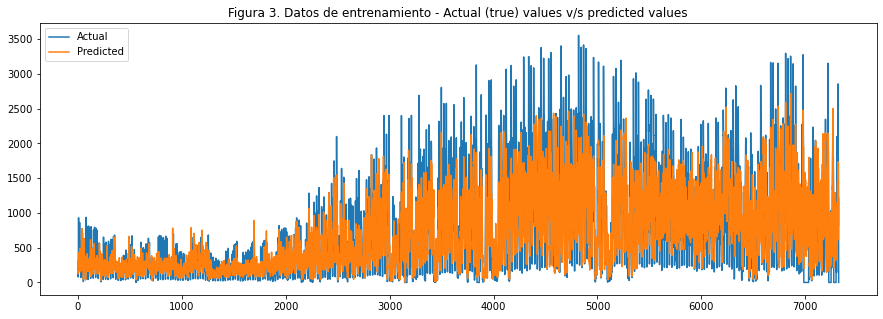

In [31]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))

plt.plot(y_train.reset_index(drop=True))
plt.plot(list(y_train_pred))
plt.title('Figura 3. Datos de entrenamiento - Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

**Data de prueba: valores reales vs predicciones**

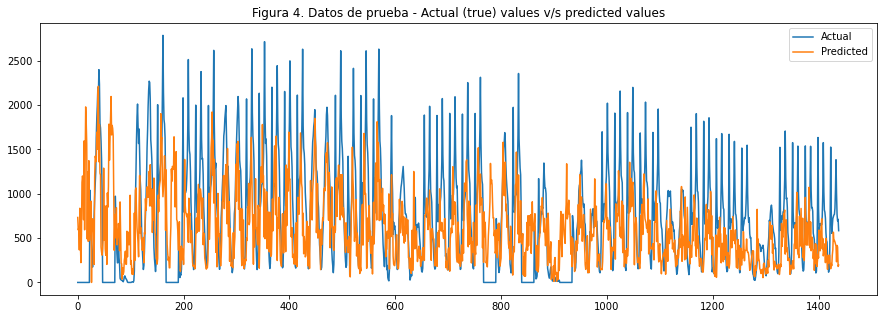

In [32]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))

plt.plot(y_test.reset_index(drop=True))
plt.plot(list(y_test_pred))
plt.title('Figura 4. Datos de prueba - Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

**Preguntas**

* ¿Son los datos del clima suficientes para predecir la demanda de bicletas con buen nivel de error?
* ¿Que se puede hacer para mejorar el desempeño del modelo?

### 6. Entregables

A. Modificando el código anterior, crea un script que entrene varios modelos de regresión KNN, considerando valores de k=3,5,10,15,20,50,100, 300, 500, 1000 con las mismas columnas del clima y la variable rented_bike_count. Este script deberá generar un gráfica en formato .png del **error RMSE obtenido en el conjunto** de prueba vs los valores de K, indicando cual es el valor donde se obtiene menor error, dicho archivo deberá denominarse `error_knn_weather.py` y la imagen `error_knn_weather.png`